# Cell learning plotting

Saved Train_loss.png
Saved Train_loss.png
Saved Train_loss.png
Saved Train_top1_error_rate.png
Saved Train_top1_error_rate.png
Saved Train_top1_error_rate.png
Saved Train_top5_error_rate.png
Saved Train_top5_error_rate.png
Saved Train_top5_error_rate.png
Saved Train_acc.png
Saved Train_acc.png
Saved Train_acc.png
Saved Validation.png


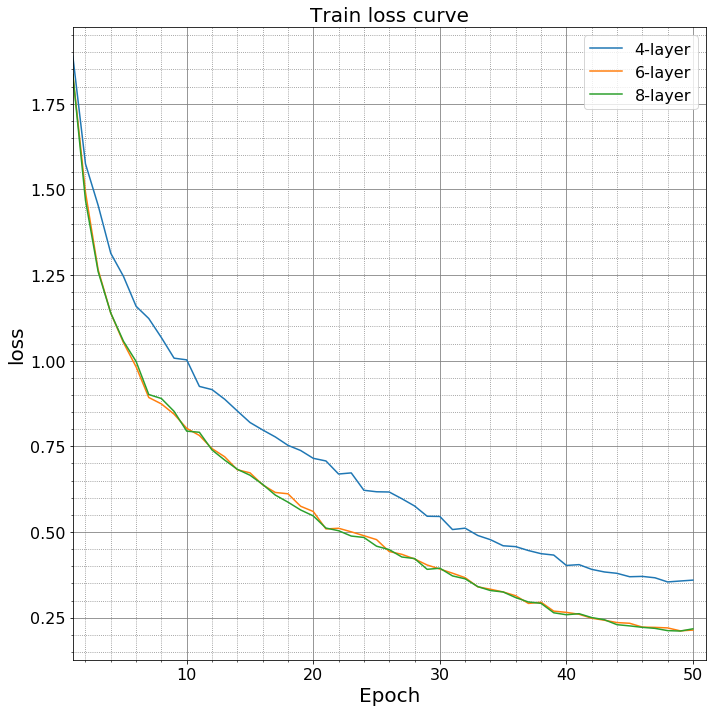

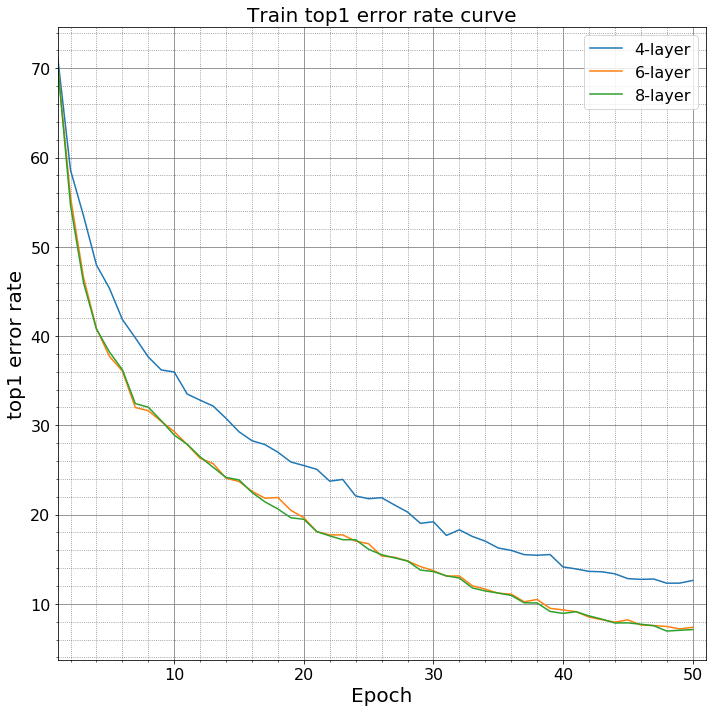

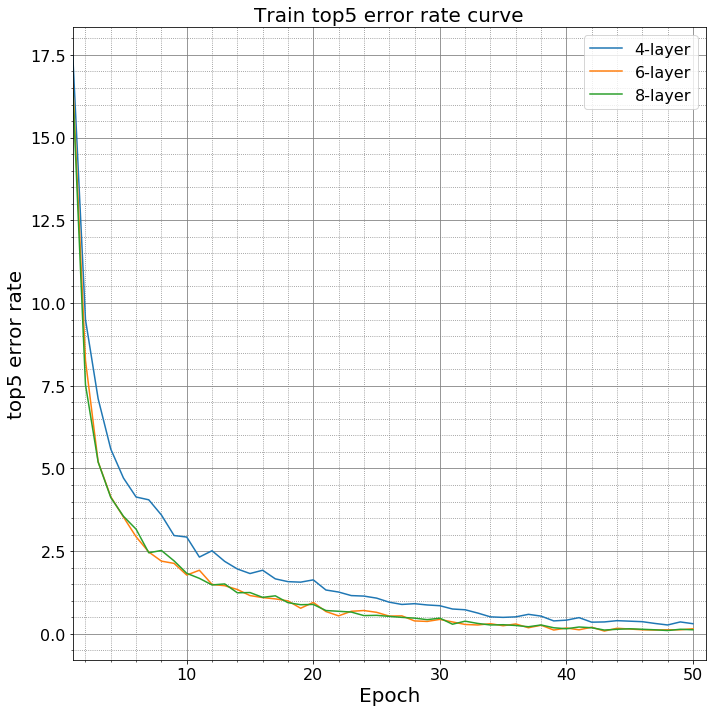

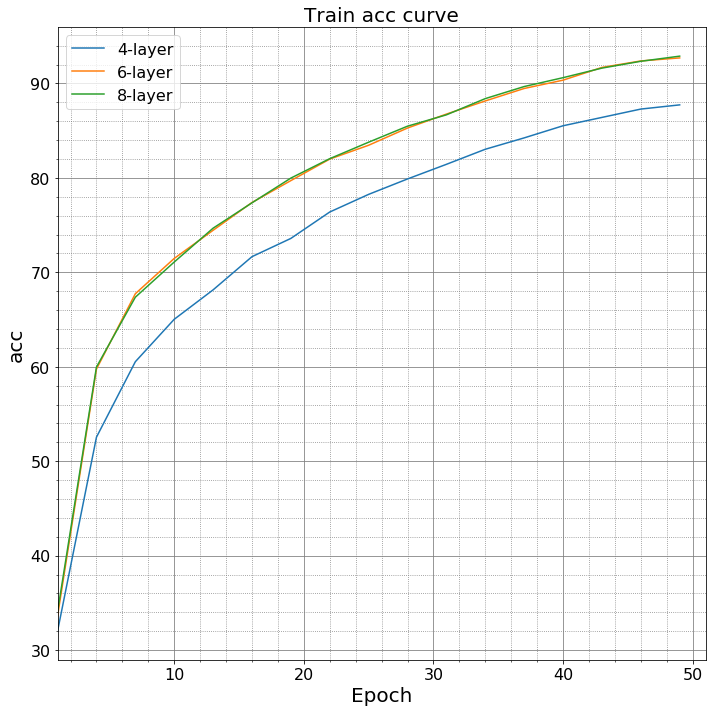

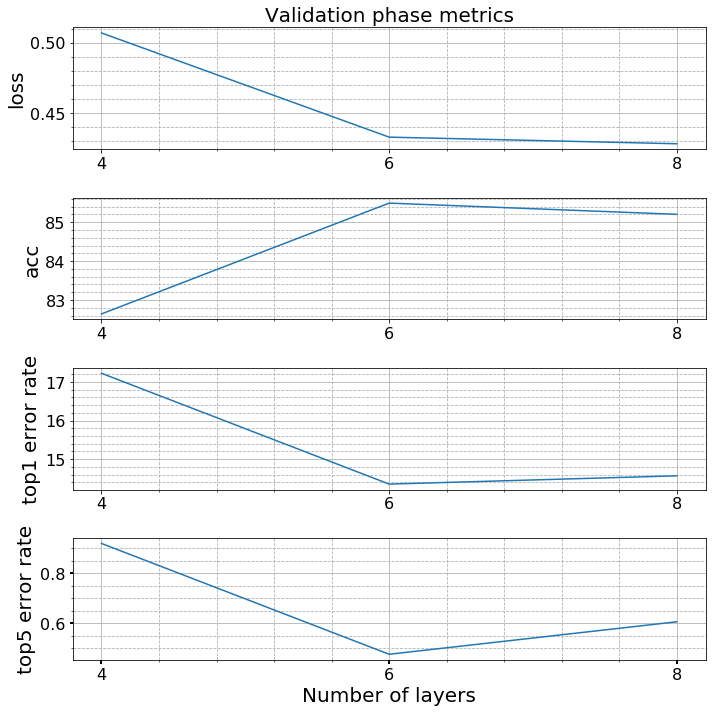

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

from collections import defaultdict

metrics = defaultdict(lambda: defaultdict(lambda: []))
metrics['Validation loss'] = []
metrics['Validation acc']  = []
metrics['Validation top1 error rate'] = []
metrics['Validation top5 error rate'] = []

layer_num_list = [4,6,8]

font_size = 16
    
for layer_num in layer_num_list:
    with open(f'log_{layer_num}search.txt') as f:
        k = 0
        for line in f:
            if 'train 050' in line:
                metrics['Train loss'][layer_num].append(float(line.split(' ')[4]))
                metrics['Train top1 error rate'][layer_num].append(100-float(line.split(' ')[5]))
                metrics['Train top5 error rate'][layer_num].append(100-float(line.split(' ')[6]))
            if 'train_acc' in line:
                metrics['Train acc'][layer_num].append(float(line.split(' ')[3]))
            if 'valid_acc' in line:
                metrics['Validation acc'].append(float(line.split(' ')[3]))
            if 'valid 050' in line:
                metrics['Validation loss'].append(float(line.split(' ')[4]))            
                metrics['Validation top1 error rate'].append(100-float(line.split(' ')[5]))
                metrics['Validation top5 error rate'].append(100-float(line.split(' ')[6])) 


val_metrics_to_plot = [] 

for metric in metrics.keys():
    if metric.startswith('Train'):
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot(1,1,1)

        for idx,layer_num in enumerate(metrics[metric].keys()):    
            ax.set_xlabel('Epoch', fontsize=font_size+4)
            x = np.arange(len(metrics[metric][layer_num])) + 1
            y = np.array(metrics[metric][layer_num])
            ax.set_xlim(1,len(x)+1)
            metric_name = metric[6:]
            ax.set_ylabel(f'{metric_name}', fontsize=font_size+4)
            ax.set_title(f'{metric} curve', fontsize=font_size+4)
            ax.grid(True)
            ax.grid(which='major', color = 'tab:gray') #draw primary grid
            ax.minorticks_on() # make secondary ticks on axes
            ax.grid(which='minor', color = 'tab:gray', linestyle = ':') # draw secondary grid
            
            if metric != 'Train acc':
                ax.plot(x, y, label=f'{layer_num}-layer')
            else:
                ax.plot(x[::3], y[::3], label=f'{layer_num}-layer')
            ax.legend(fontsize=font_size) 
            plt.tick_params(axis='both', which='major', labelsize=font_size) # increase label font size
            ax1.xaxis.set_tick_params(width=2) # increase tick size
            ax1.yaxis.set_tick_params(width=2)            
            
            save_name = '_'.join(metric.split(' ')) + '.png'
            print(f'Saved {save_name}')
        fig.tight_layout()
        fig.savefig(os.path.join(os.getcwd(),save_name))
        
    if metric.startswith('Validation'):
        val_metrics_to_plot.append(metric)

fig1 = plt.figure(figsize=(10, 10))
idx_val = 0

for metric in val_metrics_to_plot:
    ax1 = fig1.add_subplot(4,1,idx_val+1)
    if idx_val == 0:
        ax1.set_title(f'Validation phase metrics', fontsize=font_size+4)
    x = np.array(['4','6','8'])
    metric_name = ' '.join(metric.split(' ')[1:])
    ax1.set_ylabel(f'{metric_name}', fontsize=font_size+4)
    ax1.grid()
    ax1.grid(b=True,which='minor',  linestyle='--')
    ax1.minorticks_on()

    y = np.array(metrics[metric])
    metric_name = ' '.join(metric.split(' ')[1])
    ax1.plot(x, y, label=f'{metric_name}')
    plt.tick_params(axis='both', which='major', labelsize=font_size) # increase label font size
    idx_val += 1
    
ax1.set_xlabel('Number of layers', fontsize=font_size+4)
plt.tick_params(axis='both', which='major', labelsize=font_size) # increase label font size
ax1.xaxis.set_tick_params(width=2) # increase tick size
ax1.yaxis.set_tick_params(width=2)

save_name = 'Validation' + '.png'
print(f'Saved {save_name}')
idx_val += 1
fig1.tight_layout()
fig1.savefig(os.path.join(os.getcwd(),save_name))
        


# Architecture evaluation

In [75]:
from collections import defaultdict
metrics = defaultdict(lambda: [])

with open(f'log_eval.txt') as f:
    k = 0
    for line in f:
        if 'train 500' in line:
            metrics['Train loss'].append(float(line.split(' ')[4]))
            metrics['Train top1 error rate'].append(100-float(line.split(' ')[5]))
            metrics['Train top5 error rate'].append(100-float(line.split(' ')[6]))
        if 'train_acc' in line:
            metrics['Train acc'].append(float(line.split(' ')[3]))
        if 'valid_acc' in line:
            metrics['Validation acc'].append(float(line.split(' ')[3]))
        if 'valid 100' in line:
            metrics['Validation loss'].append(float(line.split(' ')[4]))            
            metrics['Validation top1 error rate'].append(100-float(line.split(' ')[5]))
            metrics['Validation top5 error rate'].append(100-float(line.split(' ')[6])) 


Saved architecture acc.png
Saved architecture loss.png
Saved architecture top1 error rate.png
Saved architecture top5 error rate.png


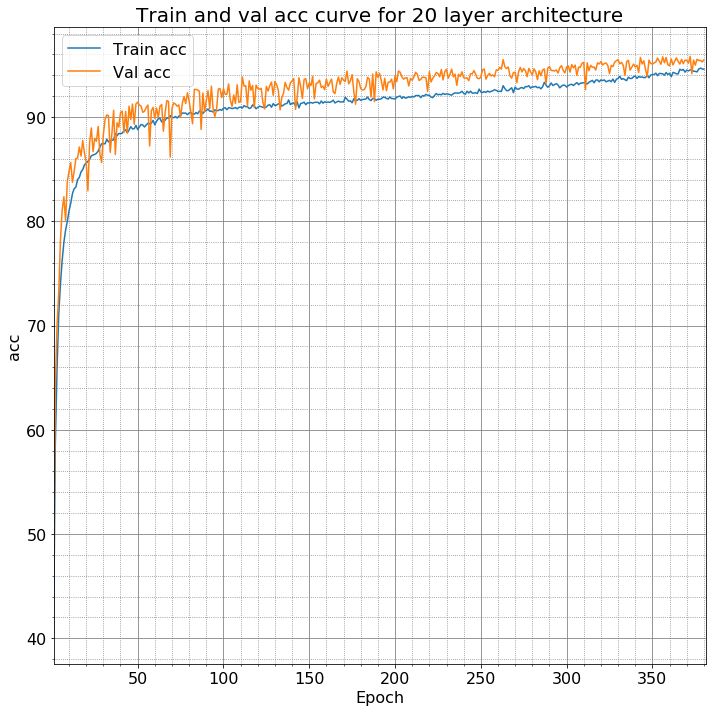

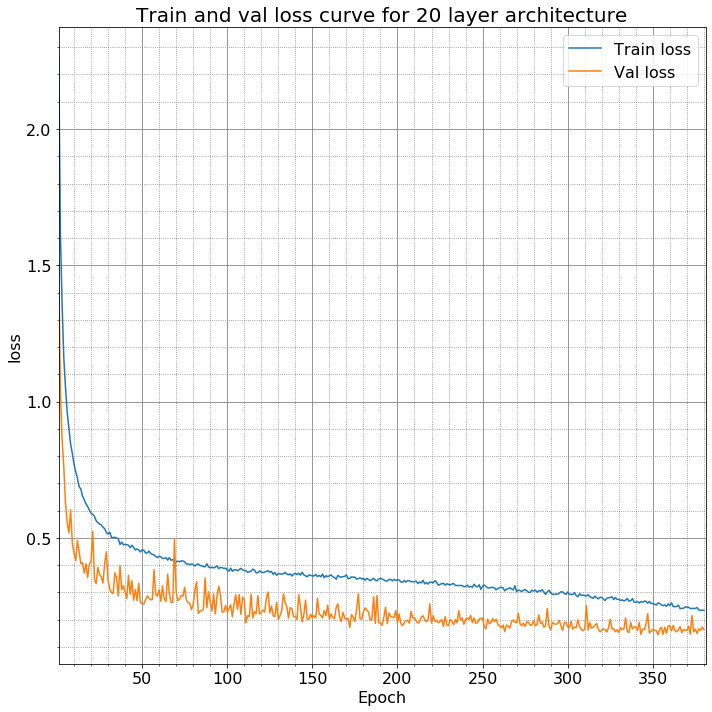

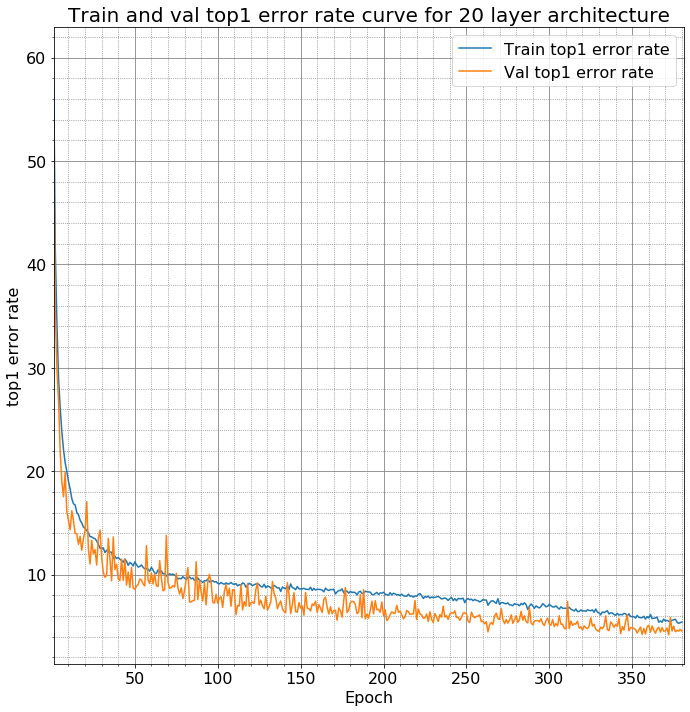

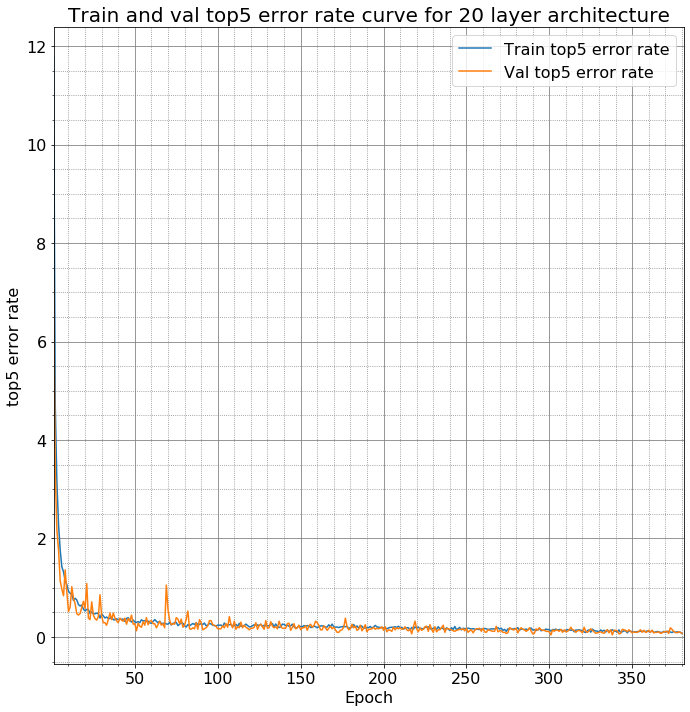

In [76]:

for metric_type in ['acc', 'loss', 'top1 error rate', 'top5 error rate']:  

    metric = 'Train ' + metric_type
    fig = plt.figure(figsize=(10, 10))   
    ax = fig.add_subplot(1,1,1)
    ax.set_xlabel('Epoch', fontsize=font_size)
    x = np.arange(len(metrics[metric])) + 1
    y = np.array(metrics[metric])
    ax.set_xlim(1,len(x)+1)
    metric_name = metric[6:]
    ax.set_ylabel(f'{metric_name}', fontsize=font_size)
    ax.set_title(f'Train and val {metric_name} curve for 20 layer architecture', fontsize=font_size+4)
    ax.grid(True)
    ax.grid(which='major', color = 'tab:gray') #draw primary grid
    ax.minorticks_on() # make secondary ticks on axes
    ax.grid(which='minor', color = 'tab:gray', linestyle = ':') # draw secondary grid
    ax.plot(x, y, label=f'{metric}')
    
    metric = 'Validation ' + metric_type
    y = np.array(metrics[metric])
    ax.plot(x, y, label=f'Val {metric_type}')

    
    ax.legend(fontsize=font_size)   
    plt.tick_params(axis='both', which='major', labelsize=font_size) # increase label font size
    ax1.xaxis.set_tick_params(width=2) # increase tick size
    ax1.yaxis.set_tick_params(width=2)
    save_name_fig =  f'architecture {metric_name}.png'
    print(f'Saved {save_name_fig}')
    fig.tight_layout()
    fig.savefig(os.path.join(os.getcwd(),save_name_fig))
